In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
diab_data = pd.read_csv('diabetes.csv')
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
diab_data.shape, diab_data.isnull().sum(),diab_data.describe()

((768, 9),
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 


In [29]:
diab_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


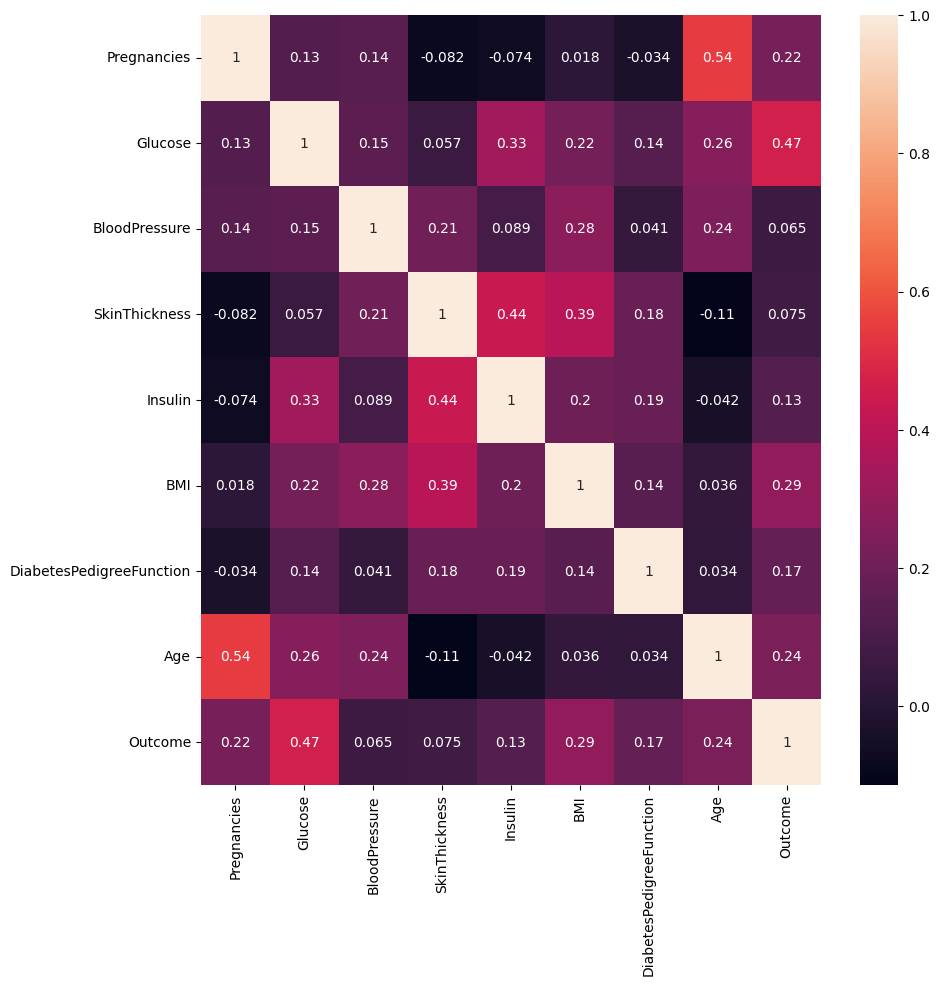

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(diab_data.corr(), annot=True)
plt.show()

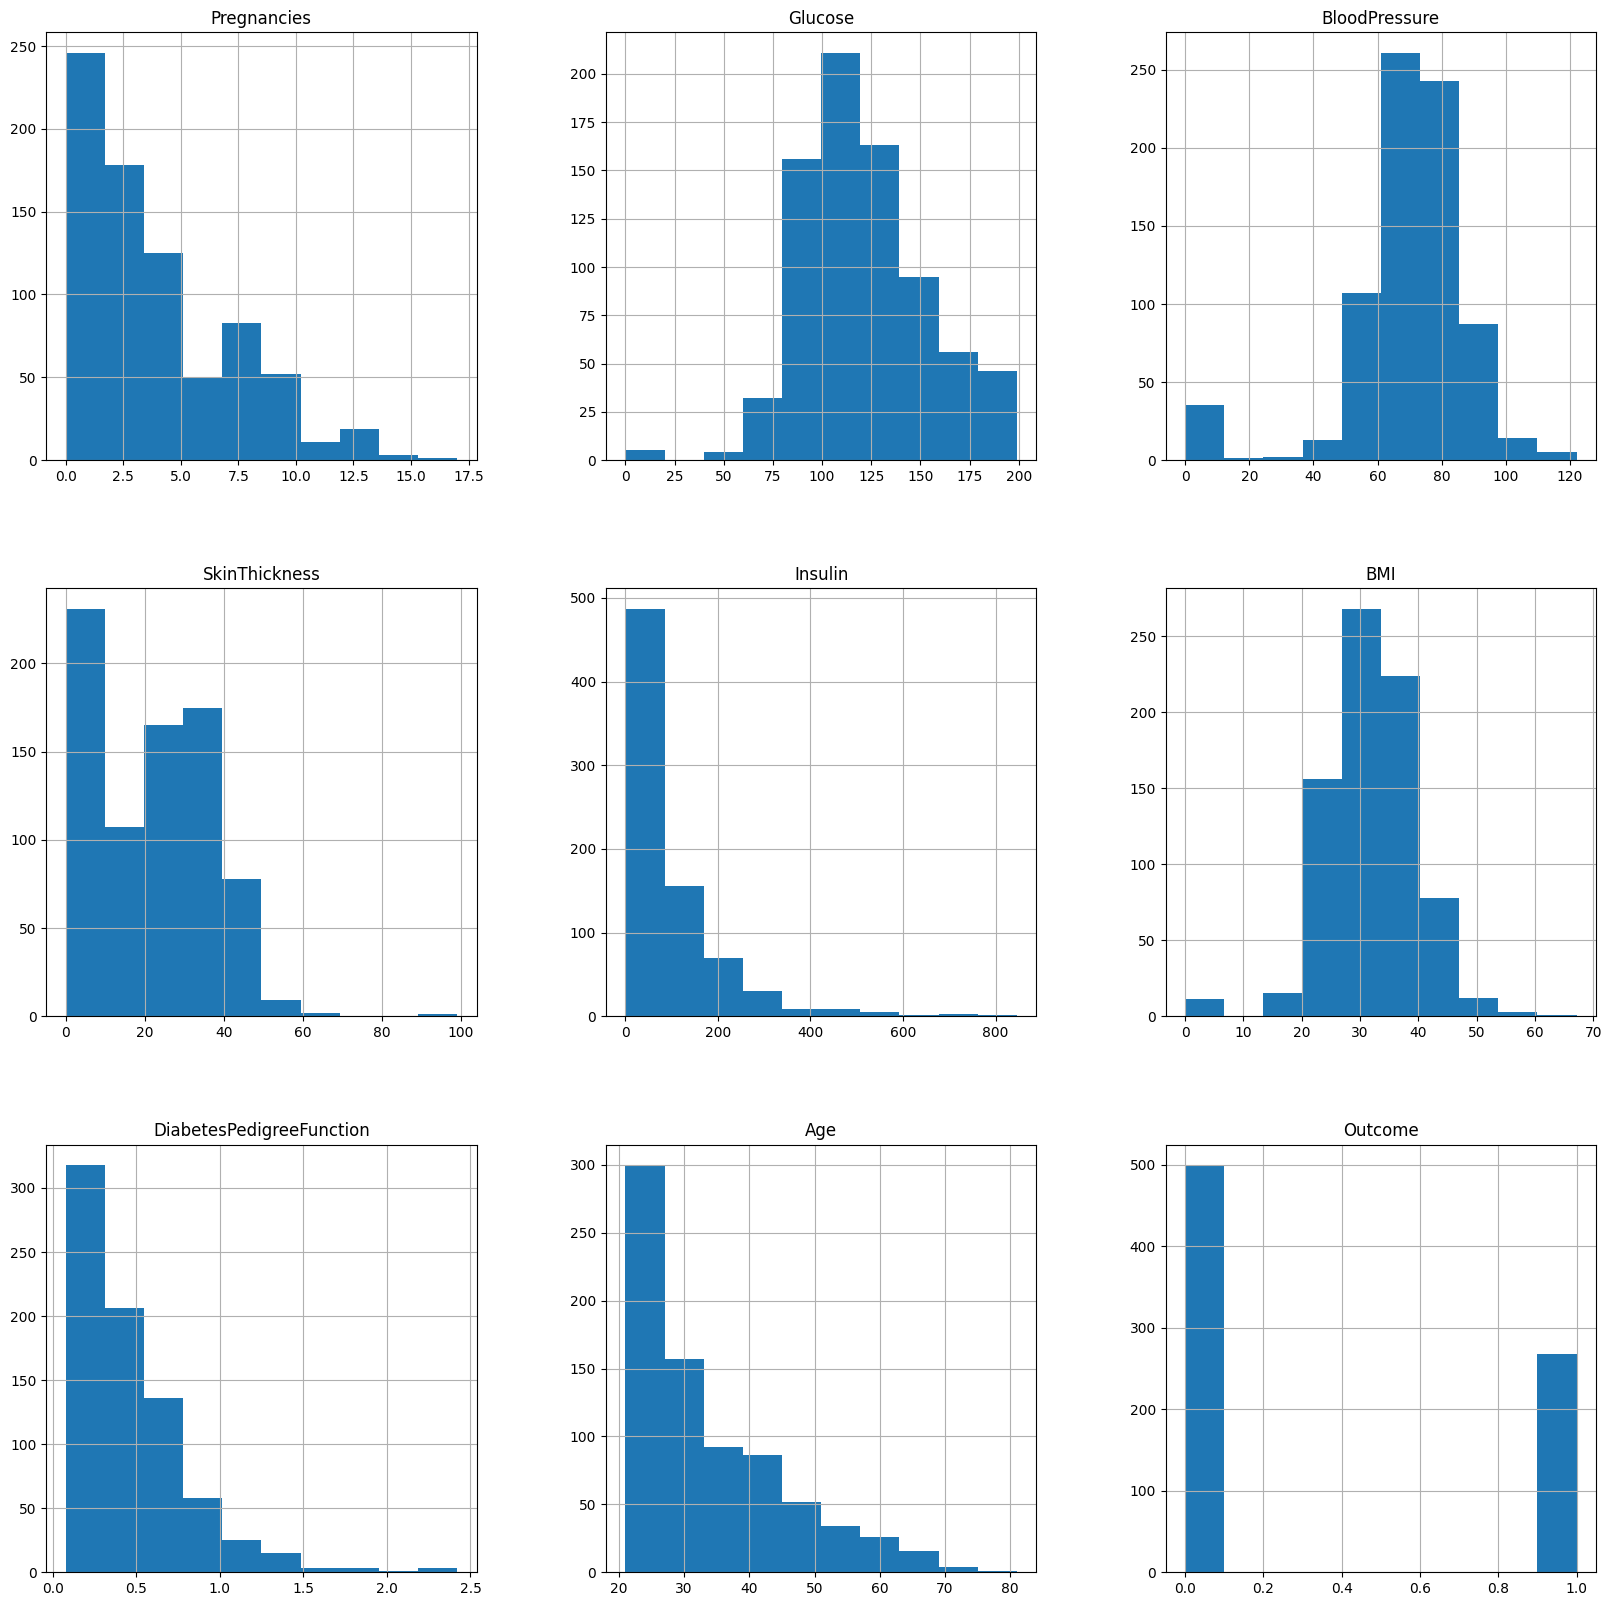

In [31]:
plot = diab_data.hist(figsize = (20,20))
plt.show()

In [32]:
#No effect of changing 0 with mean
# diab_data['Glucose'] = diab_data['Glucose'].replace(0, diab_data['Glucose'].mean())
# diab_data['BloodPressure'] = diab_data['BloodPressure'].replace(0, diab_data['BloodPressure'].mean())
# diab_data['SkinThickness'] = diab_data['SkinThickness'].replace(0, diab_data['SkinThickness'].mean())
# diab_data['Insulin'] = diab_data['Insulin'].replace(0, diab_data['Insulin'].mean())
# diab_data
# plot = diab_data.hist(figsize = (20,20))
# plt.show()

In [33]:
# plot= sns.pairplot(diab_data, hue = 'Outcome')

In [34]:

# "SkinThickness" "Insulin"
# X=diab_data[["Glucose","BMI","Age"]]
# X=diab_data[["Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"]]
# X=diab_data[["Pregnancies","Insulin"]]
X=diab_data.drop(columns='Outcome',axis=1)
Y=diab_data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [35]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,stratify=Y,random_state=2)

In [36]:
# X_train.shape,X_test.shape
# X_train

SVM is faster for large multi dimentinal dataset

In [37]:
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
X_train_prediction=model.predict(X_train)
train_accu=accuracy_score(X_train_prediction,Y_train)
train_accu

0.7866449511400652

In [38]:
X_test_prediction=model.predict(X_test)
test_accu=accuracy_score(X_test_prediction,Y_test)
test_accu

0.7727272727272727

In [40]:
confusion_matrix(Y_train,X_train_prediction),confusion_matrix(Y_test,X_test_prediction) 


(array([[357,  43],
        [ 88, 126]]),
 array([[91,  9],
        [26, 28]]))

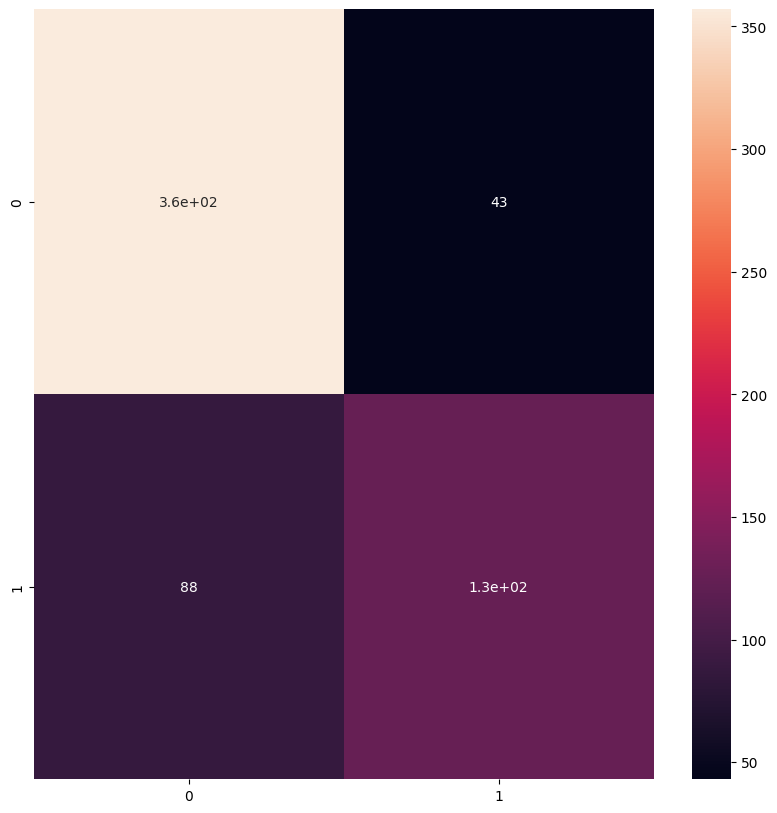

In [41]:
cm